# Bandit Problem

In [1]:
# imports
import numpy as np

class Bandit:
    def __init__(self, mean=0, stddev=1):
        self.__mean = mean
        self.__stddev = stddev

    '''This method simulates pulling the lever of the bandit and returns the reward'''
    def pullLever(self):
        return np.random.normal(self.__mean, self.__stddev)
import random
import math 
import matplotlib.pyplot as plt
# Include your imports here, if any are used. 

A list of ten bandit objects initialized in the list...

In [2]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

In [3]:
bandits[0].pullLever()

0.8317993988964224

## Greedy algorithm Implementation

In [4]:
def run_greedy():
    # TODO: Implement the greedy algorithm here
    # Return the reward from the bandits in a list
    expl_index = 10
    rewards = 0
    reward_list = [0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ]
    RLIST = [0.0]*1000
    trials = [0]*10
    tries = 0
    greedy_indx = 0
    for y in range(expl_index):
        for x in range(10):
            A = bandits[x].pullLever()
            reward_list[x] = reward_list[x] + (1/(trials[x] + 1))*(A - reward_list[x])
            trials[x] += 1
            tries += 1
            rewards += A
            RLIST[tries-1] = rewards/(tries)
    for x in range(1000-tries):
        greedy_indx = 0
        for y in range(10):
            if reward_list[greedy_indx]< reward_list[y]:
                greedy_indx = y
        A = bandits[greedy_indx].pullLever()
        rewards += A
        reward_list[greedy_indx] = reward_list[greedy_indx] + (1/(trials[greedy_indx] + 1))*(A - reward_list[greedy_indx])
        trials[greedy_indx] += 1
        RLIST[x + tries] = rewards/(x + tries + 1)    
    return RLIST
    pass

Plot the cumulative average of rewards as the number of iterations increases.

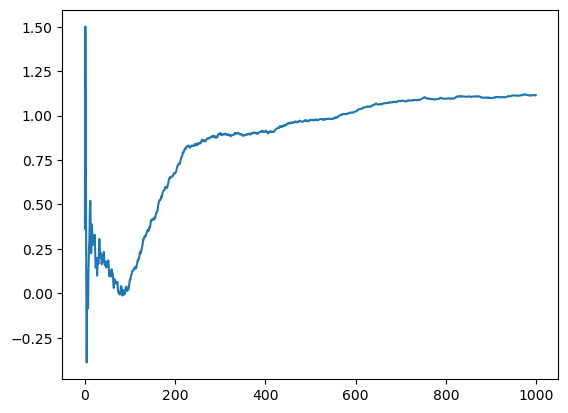

In [5]:
plt.plot(run_greedy())
plt.show()

## $\epsilon$-greedy Algorithm

In [8]:
def run_epsilon_greedy(epsilon):
    # TODO: Implement the epsilon greedy algorithm here
    # Return the reward from the bandits in a list
    RLIST = [0.0]*1000
    rewards = 0
    rewardArms = [0.0]*10
    turnArms = [0]*10
    qMax = 0
    for x in range(1000):
        case_uno = random.random()
        if case_uno<= epsilon:
            case_dos = random.randint(0, 9)
            A = bandits[case_dos].pullLever()
            rewards += A
            turnArms[case_dos] += 1
            rewardArms[case_dos] += (1/turnArms[case_dos])*(A - rewardArms[case_dos])
            RLIST[x] = rewards/(x + 1) 
        else:
            qMax = 0
            for y in range(10):
                if rewardArms[qMax] < rewardArms[y]:
                    qMax = y
            A = bandits[qMax].pullLever()
            turnArms[qMax] += 1
            rewardArms[qMax] += (1/turnArms[qMax])*(A - rewardArms[qMax])
            rewards += A
            RLIST[x] = rewards/(x + 1)
    return RLIST
    pass

Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

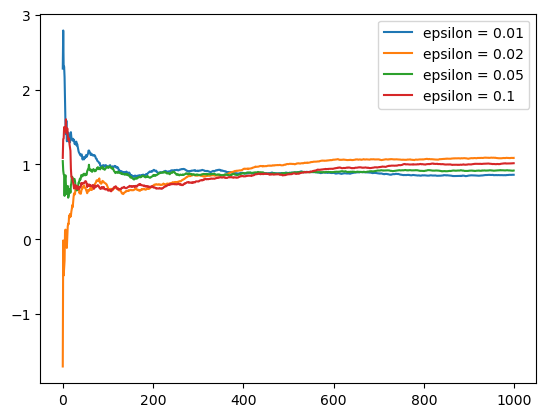

In [9]:
plt.plot(run_epsilon_greedy(0.01))
plt.plot(run_epsilon_greedy(0.02))
plt.plot(run_epsilon_greedy(0.05))
plt.plot(run_epsilon_greedy(0.1))
plt.legend(['epsilon = 0.01', 'epsilon = 0.02' ,'epsilon = 0.05' ,'epsilon = 0.1' ])
plt.show()

## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

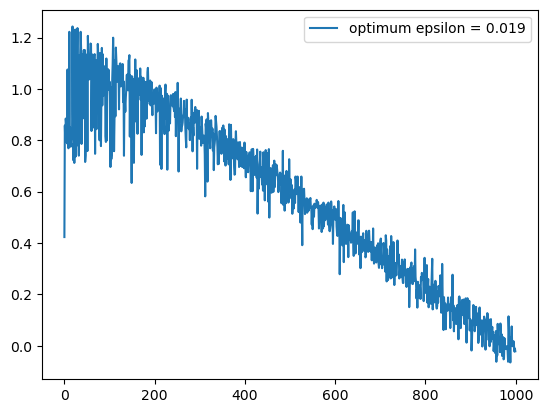

In [10]:
epsilonCheck = [0]*1000
x = 1
while x < 1001:
    epsilonCheck[x - 1] = run_epsilon_greedy(x/1000)[999]
    x += 1
maxeps = 0
for x in range(1000):
    if epsilonCheck[x] > epsilonCheck[maxeps]:
        maxeps = x
plt.plot(epsilonCheck)
plt.legend([f'optimum epsilon = {(maxeps + 1)/1000}'])
plt.show()

## Optimistic Initial Values

In [11]:
def run_optimistic_greedy():
    # TODO: Implement the optimistic greedy algorithm here
    expl_index = 0
    rewards = 0
    reward_list = [10]*10
    RLIST = [0.0]*1000
    trials = [0]*10
    tries = 0
    greedy_indx = 0
    for y in range(expl_index):
        for x in range(10):
            A = bandits[x].pullLever()
            reward_list[x] = reward_list[x] + (1/(trials[x] + 1))*(A - reward_list[x])
            trials[x] += 1
            tries += 1
            rewards += A
            RLIST[tries-1] = rewards/(tries)
    for x in range(10):
        if reward_list[greedy_indx]< reward_list[x]:
            greedy_indx = x
    for x in range(1000-tries):
        greedy_indx = 0
        for y in range(10):
            if reward_list[greedy_indx]< reward_list[y]:
                greedy_indx = y
        A = bandits[greedy_indx].pullLever()
        rewards += A
        reward_list[greedy_indx] = reward_list[greedy_indx] + (1/(trials[greedy_indx] + 1))*(A - reward_list[greedy_indx])
        trials[greedy_indx] += 1
        RLIST[x + tries] = rewards/(x + tries + 1)    
    return RLIST
    # Return the reward from the bandits in a list
    pass

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$

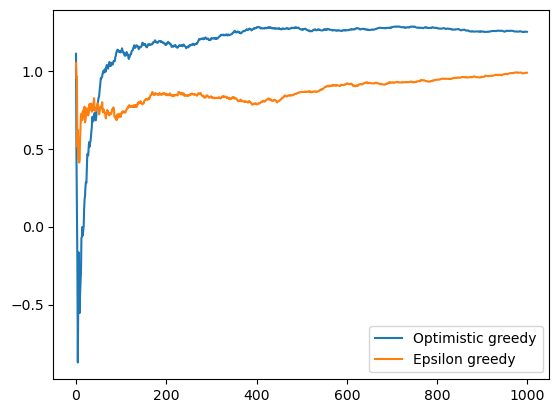

In [12]:
plt.plot(run_optimistic_greedy())
plt.plot(run_epsilon_greedy(0.1))
plt.legend(['Optimistic greedy', 'Epsilon greedy'])

## Optional - Upper Confidence Bound (UCB)

In [13]:
import math
def run_ucb(c):
    # TODO: Implement the UCB algorithm here
    # Return the reward from the bandits in a list
    rewards = 0
    reward_list = [0]*10
    RLIST = [0.0]*1000
    trials = [1]*10
    tries = 10
    greedy_indx = 0
    parameter = [0]*10
    for x in range(10):
        A = bandits[x].pullLever()
        reward_list[x] += A
        rewards += A
    for x in range(990):
        for w in range(10):
            parameter[w] = reward_list[w] + c*(math.sqrt(math.log(tries)/trials[w]))
        greedy_indx = 0
        for y in range(10):
            if parameter[greedy_indx]< parameter[y]:
                greedy_indx = y
        A = bandits[greedy_indx].pullLever()
        rewards += A
        reward_list[greedy_indx] = reward_list[greedy_indx] + (1/(trials[greedy_indx] + 1))*(A - reward_list[greedy_indx])
        trials[greedy_indx] += 1
        tries += 1
        RLIST[x + 10] = rewards/(x + 11)    
    return RLIST
    pass

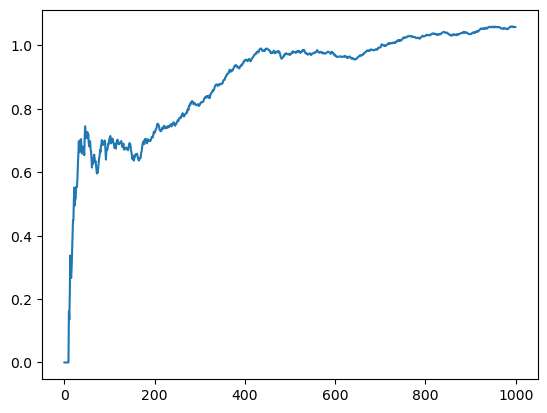

In [14]:
plt.plot(run_ucb(2))
plt.show()